In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
# fn = "/Users/orenkobo/Desktop/PhD/Aim2_new/Analysis_artifacts/new_proc_FINAL//120422_Newalignment_dict_sentences_perplexity_median_classifier/wsc_res_df.csv"
fn = "/Users/orenkobo/Desktop/PhD/Aim2_new/Analysis_artifacts/new_proc_FINAL/120422_Newalignment_dict_pre-reg-analyses_within_subject_perplexity_classifier_1000tts_iters/wsc_res_df.csv"
df = pd.read_csv(fn, index_col = False, converters = {'cv_scores' : literal_eval})
df

,iter,subj_id,y_col,model_type,conf,fs,est,cond,roi,acc,std,cv_scores
0,0,23,vodka_bert_perplexity_score,actual,0,PCA(n_components=20),"SVC(kernel='linear', probability=True)",intact,reward,0.46,0.12,"[0.42857142857142855, 0.42857142857142855, 0.6..."
1,1,23,vodka_bert_perplexity_score,actual,1,PCA(n_components=20),RandomForestClassifier(),intact,reward,0.43,0.12,"[0.42857142857142855, 0.35714285714285715, 0.4..."
2,2,23,vodka_bert_perplexity_score,actual,2,PCA(n_components=10),"SVC(kernel='linear', probability=True)",intact,reward,0.39,0.11,"[0.2857142857142857, 0.5, 0.42857142857142855,..."
3,3,23,vodka_bert_perplexity_score,actual,3,PCA(n_components=10),RandomForestClassifier(),intact,reward,0.40,0.13,"[0.35714285714285715, 0.5714285714285714, 0.42..."
4,4,30,vodka_bert_perplexity_score,actual,0,PCA(n_components=20),"SVC(kernel='linear', probability=True)",intact,reward,0.45,0.12,"[0.6428571428571429, 0.5, 0.5714285714285714, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,130,vodka_bert_perplexity_score,actual,3,PCA(n_components=10),RandomForestClassifier(),scrambled,vision,0.52,0.12,"[0.5714285714285714, 0.5, 0.5714285714285714, ..."
284,284,131,vodka_bert_perplexity_score,actual,0,PCA(n_components=20),"SVC(kernel='linear', probability=True)",scrambled,vision,0.35,0.11,"[0.5714285714285714, 0.2857142857142857, 0.428..."
285,285,131,vodka_bert_perplexity_score,actual,1,PCA(n_components=20),RandomForestClassifier(),scrambled,vision,0.35,0.12,"[0.42857142857142855, 0.42857142857142855, 0.2..."
286,286,131,vodka_bert_perplexity_score,actual,2,PCA(n_components=10),"SVC(kernel='linear', probability=True)",scrambled,vision,0.39,0.12,"[0.5714285714285714, 0.35714285714285715, 0.28..."


In [11]:
from shared_analysis_utils import strip_est, strip_fs
df['est'] = strip_est(df['est'])
df['fs'] = strip_fs(df['fs'])

In [12]:
df = df[(df.y_col == 'vodka_bert_perplexity_score') & (df.model_type == 'actual')].reset_index(drop=True)
df_intact = df[df.cond == 'intact'].reset_index(drop=True)
df_scrambled = df[df.cond == 'scrambled'].reset_index(drop=True)
explode_df = df.explode("cv_scores")
explode_df
# explode_df_intact = df_intact.explode("cv_scores")
# explode_df_intact

,iter,subj_id,y_col,model_type,conf,fs,est,cond,roi,acc,std,cv_scores
0,0,23,vodka_bert_perplexity_score,actual,0,PCA(20),SVC('linear'),intact,reward,0.46,0.12,0.428571
0,0,23,vodka_bert_perplexity_score,actual,0,PCA(20),SVC('linear'),intact,reward,0.46,0.12,0.428571
0,0,23,vodka_bert_perplexity_score,actual,0,PCA(20),SVC('linear'),intact,reward,0.46,0.12,0.642857
0,0,23,vodka_bert_perplexity_score,actual,0,PCA(20),SVC('linear'),intact,reward,0.46,0.12,0.428571
0,0,23,vodka_bert_perplexity_score,actual,0,PCA(20),SVC('linear'),intact,reward,0.46,0.12,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...
287,287,131,vodka_bert_perplexity_score,actual,3,PCA(10),RF(),scrambled,vision,0.40,0.13,0.5
287,287,131,vodka_bert_perplexity_score,actual,3,PCA(10),RF(),scrambled,vision,0.40,0.13,0.285714
287,287,131,vodka_bert_perplexity_score,actual,3,PCA(10),RF(),scrambled,vision,0.40,0.13,0.214286
287,287,131,vodka_bert_perplexity_score,actual,3,PCA(10),RF(),scrambled,vision,0.40,0.13,0.357143


<Figure size 360x576 with 0 Axes>

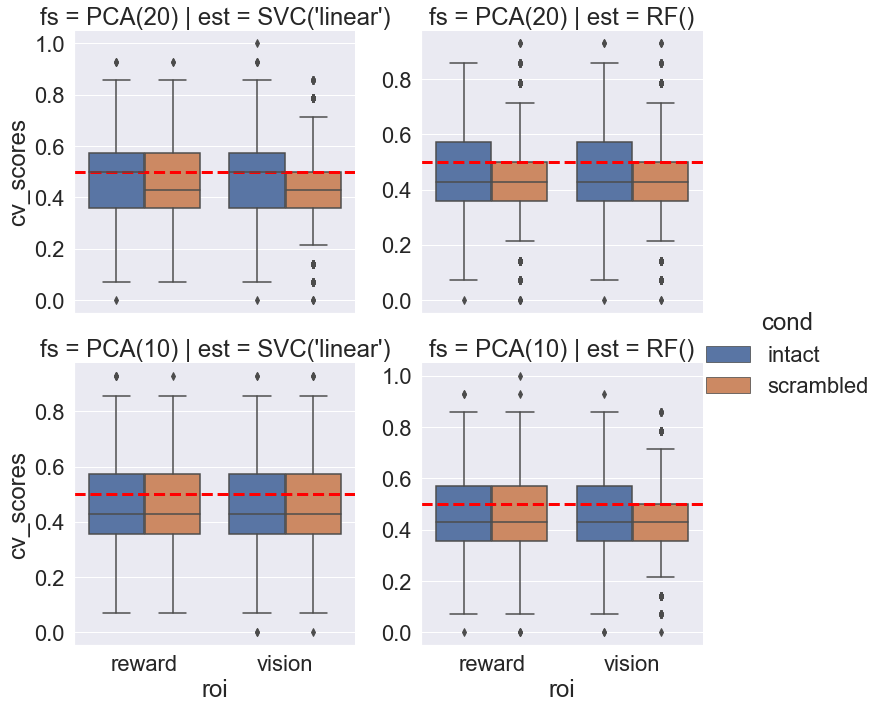

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 2)


plt.figure()
g = sns.catplot(data=explode_df, row='fs', col='est', sharey=False, x='roi', hue='cond',
            kind='box', y='cv_scores')
axes = g.axes.flatten()

for ax in axes:
    ax.axhline(0.5, ls='--', linewidth=3, color='red')
plt.show()

sns.set(font_scale = 1)

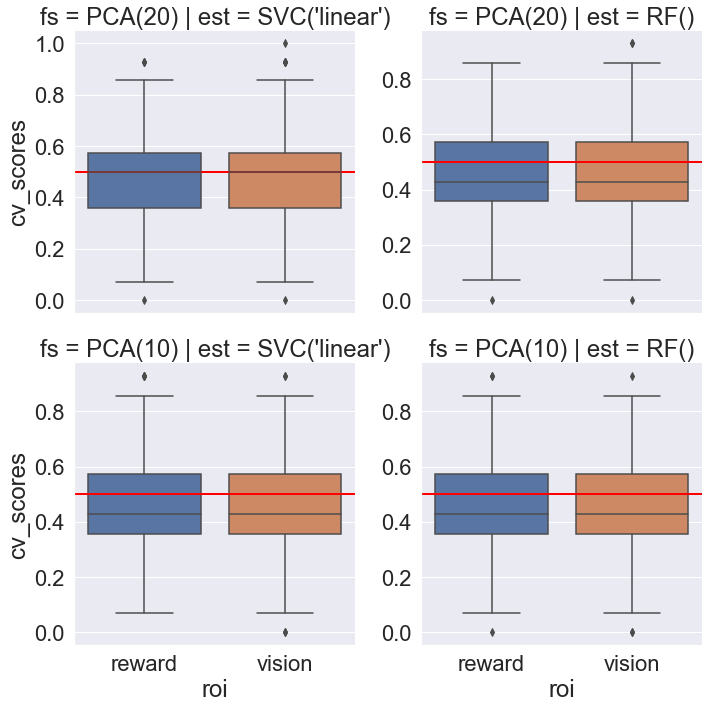

In [15]:
import seaborn as sns
sns.set(font_scale = 2)
explode_df = explode_df[explode_df.cond == 'intact']
g = sns.catplot(data=explode_df, row='fs', col='est', x='roi', sharey=False,
                kind='box', y='cv_scores')
for ax in g.axes.flatten():
    ax.axhline(0.5, color='red',linewidth=2)
sns.set(font_scale = 1)

In [16]:
df_to_viz = explode_df[(explode_df.fs == "PCA(20)") & (explode_df.est == "SVC('linear')")]
df_to_viz

,iter,subj_id,y_col,model_type,conf,fs,est,cond,roi,acc,std,cv_scores
0,0,23,vodka_bert_perplexity_score,actual,0,PCA(20),SVC('linear'),intact,reward,0.46,0.12,0.428571
0,0,23,vodka_bert_perplexity_score,actual,0,PCA(20),SVC('linear'),intact,reward,0.46,0.12,0.428571
0,0,23,vodka_bert_perplexity_score,actual,0,PCA(20),SVC('linear'),intact,reward,0.46,0.12,0.642857
0,0,23,vodka_bert_perplexity_score,actual,0,PCA(20),SVC('linear'),intact,reward,0.46,0.12,0.428571
0,0,23,vodka_bert_perplexity_score,actual,0,PCA(20),SVC('linear'),intact,reward,0.46,0.12,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,110,vodka_bert_perplexity_score,actual,0,PCA(20),SVC('linear'),intact,vision,0.40,0.11,0.642857
140,140,110,vodka_bert_perplexity_score,actual,0,PCA(20),SVC('linear'),intact,vision,0.40,0.11,0.285714
140,140,110,vodka_bert_perplexity_score,actual,0,PCA(20),SVC('linear'),intact,vision,0.40,0.11,0.214286
140,140,110,vodka_bert_perplexity_score,actual,0,PCA(20),SVC('linear'),intact,vision,0.40,0.11,0.571429


<AxesSubplot:xlabel='roi', ylabel='cv_scores'>

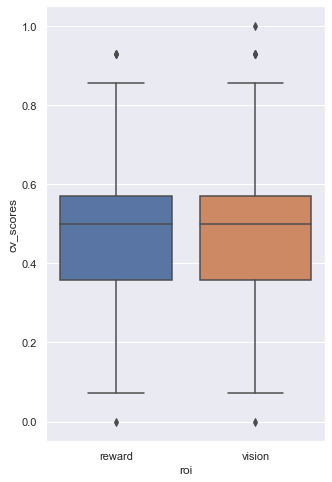

In [19]:
sns.boxplot(data=df_to_viz,  x='roi',# hue='cond',
             y='cv_scores')

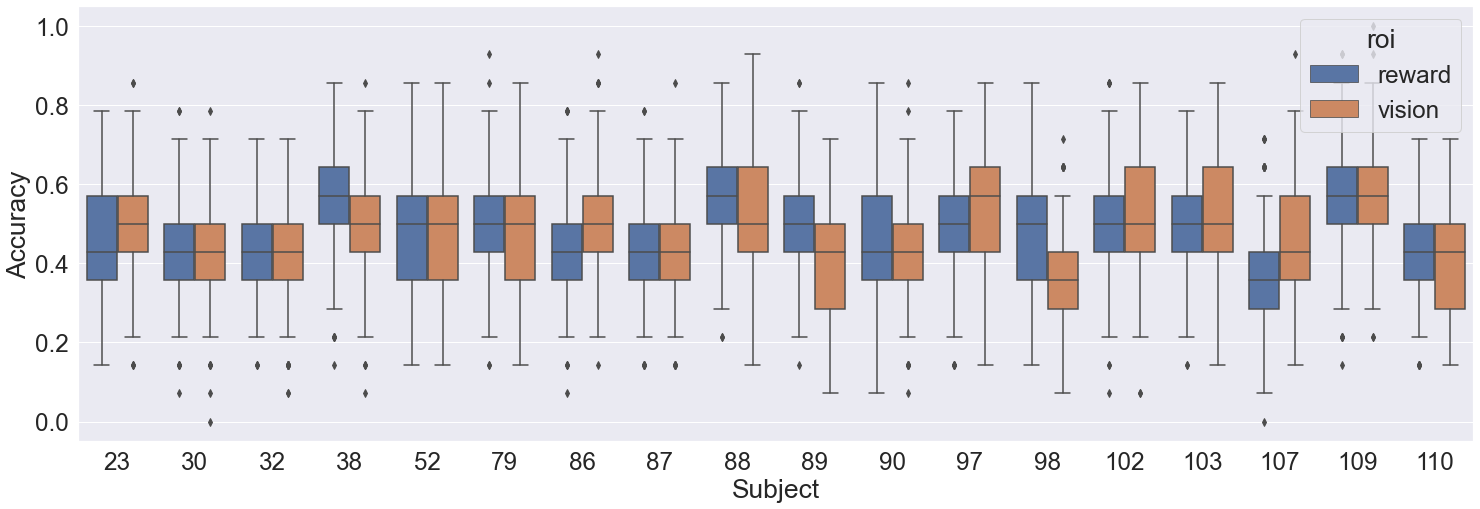

In [31]:
sns.set(font_scale=2.2)
plt.figure(figsize=(25,8))
sns.boxplot(data=df_to_viz[df_to_viz.cond == 'intact'].rename({"cv_scores" : "Accuracy", "subj_id" : "Subject"},axis=1), x='Subject', hue='roi',  y='Accuracy')
sns.set(font_scale=1)

AA : wilcoxon: z = 13108499.5 , p = 2.7528578784621783e-06 


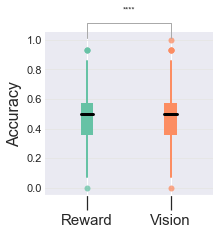

('AA : wilcoxon: z = 13108499.5 , p = 2.7528578784621783e-06 ',
 <AxesSubplot:ylabel='Accuracy'>)

In [22]:
from shared_analysis_utils import draw_stars_box
df_to_viz_r = df_to_viz[df_to_viz.roi == 'reward']
df_to_viz_v = df_to_viz[df_to_viz.roi == 'vision']
r_regr_acc_l_i = df_to_viz_r.cv_scores
r_control_acc_l_i = df_to_viz_v.cv_scores
draw_stars_box(r_regr_acc_l_i, r_control_acc_l_i, 'wilcoxon',"AA", ylabel="Accuracy",xlabels=['Reward','Vision'])#, title='ROI = Reward')


AA : wilcoxon: z = 13172443.5 , p = 2.8480661800321058e-09 


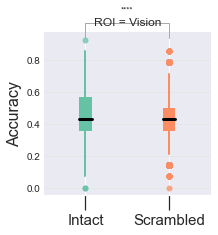

('AA : wilcoxon: z = 13172443.5 , p = 2.8480661800321058e-09 ',
 <AxesSubplot:title={'center':'ROI = Vision'}, ylabel='Accuracy'>)

In [9]:
v_regr_acc_l_i = df_to_viz_it[df_to_viz_it.roi == 'vision'].cv_scores
v_control_acc_l_i = df_to_viz_sc[df_to_viz_sc.roi == 'vision'].cv_scores
draw_stars_box(v_regr_acc_l_i, v_control_acc_l_i, 'wilcoxon',"AA", ylabel="Accuracy",xlabels=['Intact','Scrambled'], title='ROI = Vision')